In [1]:
import pandas as pd
import numpy as np
import time
import json
import seaborn as sns
import os
from ast import literal_eval
from termcolor import colored
import ast
import colorsys

from IPython.display import display
from IPython.display import HTML
import matplotlib.pyplot as plt
import requests, decimal, itertools, re

from matplotlib import font_manager, rc
%matplotlib inline
import platform
rc('font', family='AppleGothic')

import warnings
warnings.filterwarnings("ignore")



In [2]:
def year_month(job_df):
    year_lst = []
    mon_lst = []

    for i in job_df.on_date:
        if i == np.nan:
            year = i
            mon = i
            year_lst.append(year)
            mon_lst.append(mon)
        else:
            try:
                year = i[:4]
                mon = i[5:7]
                year_lst.append(year)
                mon_lst.append(mon)
            except TypeError:
                year = i
                mon = i
                year_lst.append(year)
                mon_lst.append(mon)
#     print(len(year_lst), len(mon_lst))
    return year_lst, mon_lst

def process_1(job_df):
    year_lst, mon_lst = year_month(job_df)
    job_df['year'] = year_lst
    job_df['month'] = mon_lst
    print(job_df.shape)
    
    check_year = pd.DataFrame(job_df.year.value_counts(sort = True))
    check_year = check_year.sort_index(ascending = True)
    ax = check_year.plot(kind = 'bar')
    ax.set_xlabel('year (년)')
    ax.set_ylabel('지원자 수 (명)')
    plt.show()
    return job_df



(104211, 17)
(104211, 19)


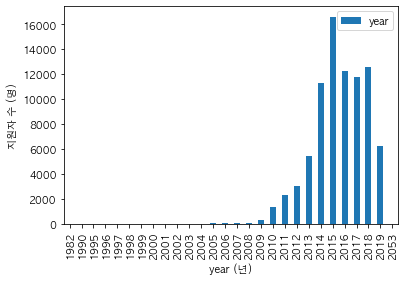

,company,dptment,title,jp_date,difficult,on_date,route,headline,question,thought,duration,result,experience,comp_id,type,region,avg_salary,year,month
0,페이스북코리아(유),영업/제휴,과장,2019-09-15,보통,2019-08-01,직원추천,"링크드인에서 채용담당자에게 연락. 스크리닝 인터뷰 약 2회, 직속 상사와의 전화 면...","면접이 그렇게 어렵지는 않았고, 본인의 역량이 지원한 직종에서 원하는 역량과 어떻게...",이전 업무가 마케팅 업무였고 지원 직종은 세일즈라 대상이 조금 달라질 뿐 설득의 ...,NaN,대기중,긍정적,90364,IT/웹/통신,서울,"14,001",2019,08
1,페이스북코리아(유),경영/기획/컨설팅,부장,2019-08-18,보통,2019-04-01,온라인지원,영어 이력서를 제출하고 서류 전형 통과해 싱가퐇에 있는 담당자와 약 30분 정도 전...,경력 요약 가정잘했던 케이스 팀원들과 어떻게 일했는지 왜 옮길려거 하는지 본인 강점 단점,영어로 진행되기 때문에 본인이 예상질문에 대한 답변을 미리 생각하고 준비해 명료하...,NaN,불합격,긍정적,90364,IT/웹/통신,서울,"14,001",2019,04
2,페이스북코리아(유),마케팅/시장조사,사원-대졸,2019-08-01,매우 어려움,2019-01-01,온라인지원,인터뷰 한번이었고 면접자들 다 고스펙이었고 해외유학파 굉장히 많았습니다.,페이스북이 더 글로벌한 회사로 성장하기 위해서 어떻게 해야하는지 방향성 제시,단순 sns로서의 기능뿐만 아니라 소비자들이 현시대를 살아가면서 사용하지 않으면 ...,30.0,합격,보통,90364,IT/웹/통신,서울,"14,001",2019,01


In [3]:
job_df = pd.read_csv('job_market_final.csv')
print(job_df.shape)
job_df = process_1(job_df)
job_df.head(3)

In [4]:
df = job_df[job_df.year == "2019"]
df = df.reset_index()
print("Total data size:","\nrows =",df.shape[0], "\ncolumns =", df.shape[1])
df.head()

Total data size: 
rows = 6244 
columns = 20


,index,company,dptment,title,jp_date,difficult,on_date,route,headline,question,thought,duration,result,experience,comp_id,type,region,avg_salary,year,month
0,0,페이스북코리아(유),영업/제휴,과장,2019-09-15,보통,2019-08-01,직원추천,"링크드인에서 채용담당자에게 연락. 스크리닝 인터뷰 약 2회, 직속 상사와의 전화 면...","면접이 그렇게 어렵지는 않았고, 본인의 역량이 지원한 직종에서 원하는 역량과 어떻게...",이전 업무가 마케팅 업무였고 지원 직종은 세일즈라 대상이 조금 달라질 뿐 설득의 ...,NaN,대기중,긍정적,90364,IT/웹/통신,서울,"14,001",2019,08
1,1,페이스북코리아(유),경영/기획/컨설팅,부장,2019-08-18,보통,2019-04-01,온라인지원,영어 이력서를 제출하고 서류 전형 통과해 싱가퐇에 있는 담당자와 약 30분 정도 전...,경력 요약 가정잘했던 케이스 팀원들과 어떻게 일했는지 왜 옮길려거 하는지 본인 강점 단점,영어로 진행되기 때문에 본인이 예상질문에 대한 답변을 미리 생각하고 준비해 명료하...,NaN,불합격,긍정적,90364,IT/웹/통신,서울,"14,001",2019,04
2,2,페이스북코리아(유),마케팅/시장조사,사원-대졸,2019-08-01,매우 어려움,2019-01-01,온라인지원,인터뷰 한번이었고 면접자들 다 고스펙이었고 해외유학파 굉장히 많았습니다.,페이스북이 더 글로벌한 회사로 성장하기 위해서 어떻게 해야하는지 방향성 제시,단순 sns로서의 기능뿐만 아니라 소비자들이 현시대를 살아가면서 사용하지 않으면 ...,30.0,합격,보통,90364,IT/웹/통신,서울,"14,001",2019,01
3,41,애터미(주),경영/기획/컨설팅,부장,2019-02-19,어려움,2019-02-01,직원추천,인터뷰 이전에 애터미가 주관하는 행사를 직접 참여하여 애터미가 가지는 기업 이미지와...,애터미가 가지는 독특한 사업 형태에 대한 의견.꿈이 무엇인가라는 포괄적으로 인생을 ...,애터미는 다단계라는 편견 속에 있는 착한 기업이다. 착한 기업을 유지하는 것은 임...,NaN,합격,긍정적,112614,유통/무역/운송,충남,"7,748",2019,02
4,43,애터미(주),디자인,사원-대졸,2019-10-24,매우 어려움,2019-10-01,온라인지원,소개로 지원하여 1차 실무진 2차 임원 면접 진행. 인사팀이 면접에 대한 설명 부족...,1차에는 인사팀에서 기업에 맞는 사람인지 파악하려는 질문과 실무진은 현직장에서 하고...,내가 생각하는 범위 내에서 할 수 있는 대답을 하였고 종교는 무교라고 대답.,NaN,합격,부정적,112614,유통/무역/운송,충남,"7,748",2019,10


In [5]:
avg_sal = []
for i in df.avg_salary:
    conv = float(i.replace(',',''))
    avg_sal.append(conv)
df['avg_salary'] = avg_sal

In [6]:
print("After salary-grouping, \ndata size:","\nrows =",df.shape[0], "\ncolumns =", df.shape[1])

After salary-grouping, 
data size: 
rows = 6244 
columns = 20


In [7]:
prov = pd.DataFrame(df.region.value_counts())


In [8]:
prov_lst = []
for i in prov.index:
    if i == '서울':
        pr = 'Seoul'
        prov_lst.append(pr)
    elif i == '경기':
        pr = 'Gyeonggi-do'
        prov_lst.append(pr)
    elif i == '대전':
        pr = 'Daejeon'
        prov_lst.append(pr)
    elif i == '전남':
        pr = 'Jeollanam-do'
        prov_lst.append(pr)
    elif i == '인천':
        pr = 'Incheon'
        prov_lst.append(pr)
    elif i == '경남':
        pr = 'Gyeongsangnam-do'
        prov_lst.append(pr)
    elif i == '충남':
        pr = 'Chungcheongnam-do'
        prov_lst.append(pr)
    elif i == '부산':
        pr = 'Busan'
        prov_lst.append(pr)
    elif i == '경북':
        pr = 'Gyeongsangbuk-do'
        prov_lst.append(pr)
    elif i == '제주':
        pr = 'Jeju'
        prov_lst.append(pr)
    elif i == '울산':
        pr = 'Ulsan'
        prov_lst.append(pr)
    elif i == '강원':
        pr = 'Gangwon-do'
        prov_lst.append(pr)
    elif i == '세종':
        pr = 'Sejong'
        prov_lst.append(pr)
    elif i == '충북':
        pr = 'Chungcheongbuk-do'
        prov_lst.append(pr)
    elif i == '광주':
        pr = 'Gwangju'
        prov_lst.append(pr)
    elif i == '전북':
        pr = 'Jeollabuk-do'
        prov_lst.append(pr)
    elif i == '해외':
        pr = 'overseas'
        prov_lst.append(pr)
    elif i == '대구':
        pr = 'Daegu'
        prov_lst.append(pr)
    else:
        pr = 'others'
        prov_lst.append(pr)

prov['reg'] = prov_lst


In [9]:
import os
import folium
import json
from IPython.display import HTML
import warnings

warnings.filterwarnings(action='ignore')
cwd = str(os.getcwd())
geo_path = cwd + '/skorea-provinces.json'
geo_str = json.load(open(geo_path, encoding = 'utf-8'))

In [10]:
color_lst = []
for i in prov.region:
    if i > 3000:
        co = 'red'
        color_lst.append(co)
    elif i > 1000 and i <= 3000:
        co = 'orage'
        color_lst.append(co)
    elif i > 200 and i <= 1000:
        co = 'blue'
        color_lst.append(co)
    elif i > 100 and i <= 200:
        co = 'green'
        color_lst.append(co)
    else:
        co = 'yellow'
        color_lst.append(co)
prov['color'] = color_lst
prov['count'] = np.log2(prov['region'])

In [11]:
prov = prov.reset_index()


In [12]:
the_map = folium.Map(location = [36, 127.5], zoom_start = 7, tiles = 'Mapbox Bright')
the_map.choropleth(geo_data = geo_str, 
               data = prov, 
               columns = ['reg','count'],
               key_on = 'feature.properties.NAME_1',
               fill_color = 'YlOrRd',
               nan_fill_color = 'white')
the_map.save('map.html')
# HTML('<iframe src=map.html width=500 height=650></iframe>')

In [13]:

def pie_graph_double(df, by, key, val, ok):
    query = df[str(by)][df[str(key)]==str(val)].value_counts(ascending = True)
    total_sum = query.values.sum()
    print("Total Applicants:", total_sum)

    lab_lst = []
    val_lst = []
    col_lst = []
    for label, value in zip(query.index, query.values):
        if label == '합격':
            color = 'green'
            col_lst.append(color)
        elif label == '대기중':
            color = 'yellowgreen'
            col_lst.append(color)
        elif label == '불합격':
            color = 'red'
            col_lst.append(color)
        else:
            label == label
        lab_lst.append(label)
        val_lst.append(value)    
    ratio = [int(round(int(i)/total_sum,2)*100) for i in val_lst]
    
    plt.figure(figsize = (14,5))
    plt.subplot(1,2,1)
    query.plot(kind = 'barh')
    plt.title(str(val)+ '기준 '+ str(by)+'별 지원자 수 그래프')

    exp_len = len(query)
    exp_lst = []
    for i in range(len(query)):
        exp_lst.append(0.05)
        
    plt.subplot(1,2,2)
    try:
        plt.pie(ratio, labels = lab_lst, colors = col_lst, autopct = '%0.1f%%',startangle=0, explode = tuple(exp_lst))  
    except StopIteration:
        plt.pie(ratio, labels = lab_lst, autopct = '%0.1f%%',startangle=0, explode = tuple(exp_lst))  
    plt.title(str(val)+ '기준 '+ str(by)+'별 지원자 비율 그래프')
    img_name = 'plots/'+str(ok)+'_'+str(by)+'_'+str(val)[:2]+'.png'
    plt.savefig(img_name)
    print(img_name)
    plt.show()
    query_index = query.index
    
    
def pie_graph_single(df, by, comp):
    query = df[str(by)].value_counts(ascending = True)
    
    total_sum = query.values.sum()
    print(total_sum)
    lab_lst = []
    val_lst = []
    for label, value in zip(query.index, query.values):
        lab_lst.append(label)
        val_lst.append(value)    
    ratio = [int(round(int(i)/total_sum,2)*100) for i in val_lst]
    
    
    plt.figure(figsize = (12,4))
    plt.subplot(1,2,1)
    query.plot(kind = 'barh')
#     plt.ylabel('총 지원자 수')
    plt.title(str(by)+ '별 지원자 수 그래프')
    plt.subplot(1,2,2)
    
    exp_len = len(query)
    exp_lst = []
    for i in range(len(query)):
        exp_lst.append(0.05)
    
    plt.pie(ratio, labels = lab_lst, autopct = '%0.1f%%',startangle=0, explode = tuple(exp_lst)) 
    plt.title(str(by)+ '별 지원자 비율 그래프')
    img_name = 'plots/'+str(comp)+'_지원자_'+str(by)+'.png'
    print(img_name)
    plt.savefig(img_name)
    plt.show()
    
def comp_map_pass(df, comp_type, title, user_title):
    df['company'][(df['type'] == str(comp_type))&(df[str(title)] == str(user_title))&
                  (df['result'] == '합격')].value_counts(ascending = True)[-10:].plot(kind = 'barh')
    plt.show()
    
    reg_df = pd.DataFrame(df['region'][(df['type'] == str(comp_type))&(df[str(title)] == str(user_title))&
                                       (df['result'] == '합격')].value_counts(ascending = True))
    reg_df = reg_df.reset_index()
    
    map_df = pd.merge(reg_df, prov, how = 'left', on = 'index')
    the_map = folium.Map(location = [36, 127.5], zoom_start = 7, tiles = 'Mapbox Bright')
    the_map.choropleth(geo_data = geo_str, 
                   data = map_df, 
                   columns = ['reg','region_x'],
                   key_on = 'feature.properties.NAME_1',
                   fill_color = 'YlOrRd',
                   nan_fill_color = 'white')
    the_name =str(comp_type).split('/')[0]+'_'+str(user_title).split('-')[1]+'.html'
    print(the_name)
    the_map.save(the_name)
#     return HTML('<iframe src='+the_name+' width=500 height=650></iframe>')


## Report Head

In [14]:
main_title = "인사 데이터 분석"
main_owner = "강종구"
main_png = "main_logo.png"
side_png = "side_logo.png"

## First page

#### 지원자 직급 시각화

6244
plots/전체_지원자_title.png


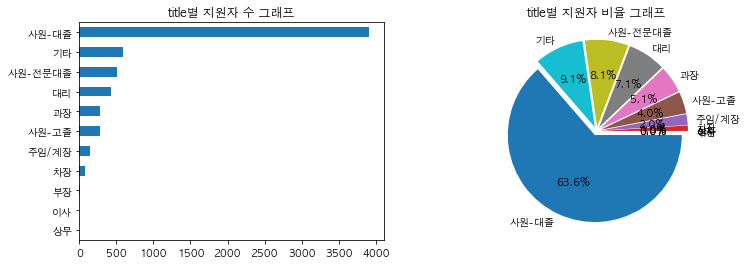

In [15]:
pie_graph_single(df, 'title','전체')

In [16]:
first_png1 = "plots/전체_지원자_title.png"
first_title1 = "현재 구직자들은 누구인가"
first_insight1 = "2019년 구직시장에서 활동한 구직자는 총 6244명이고, \
                이 중 대졸출신-사원의 전체 비율은 63%로 가장 구직활동이 활발함.(사원 전체는 75%)\
                대리-과장-차장-부장-이사와 같이 직급이 높을수록 구직활동이 현저하게 줄어 듬"


#### 지원자의 관심 산업 시각화

6244
plots/전체_지원자_type.png


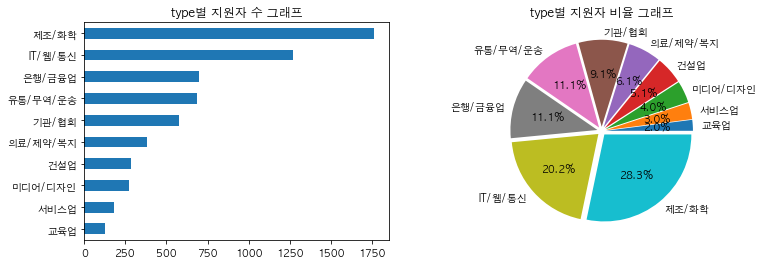

In [17]:
pie_graph_single(df, 'type','전체')

In [18]:
first_png2 = "plots/전체_지원자_type.png"
first_title2 = "현재 구직자들의 관심 산업"
first_insight2 = "2019년 구직자의 관심 산업은 6244명 중 28%의 구직자가 지원을 한 [제조/화학] 산업이 가장 높고,\
            [IT/웹/통신] 산업이 20%로 그 다음으로 높은 순위를 보이고 있다. 이와 반대로, [교육업]은 2%로 가장 낮은 지원율을 보였고,\
            [서비스업] 3%, [미디어/디자인] 산업은 4%의 지원율을 보임"

#### 왜 구직자들은 [제조/화학]과 [IT/웹/통신] 산업의 구직을 원할까

In [19]:
sal = df['avg_salary'].groupby(df['type']).mean().round(0).reset_index()
sal = sal.sort_values('avg_salary', ascending = True)
sal

,type,avg_salary
2,교육업,3102.0
5,서비스업,3378.0
3,기관/협회,3999.0
1,건설업,4254.0
4,미디어/디자인,4814.0
6,유통/무역/운송,5157.0
8,의료/제약/복지,5339.0
0,IT/웹/통신,5356.0
7,은행/금융업,5581.0
9,제조/화학,6662.0


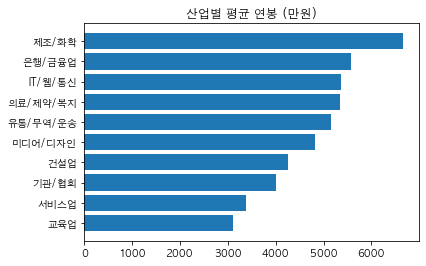

In [20]:
plt.barh(sal.type, sal.avg_salary)
plt.title('산업별 평균 연봉 (만원)')
plt.savefig('plots/전체_산업별연봉.png')
plt.show()

In [21]:
second_png1 = "plots/전체_산업별연봉.png"
second_title1 = "현재 구직자들의 관심산업의 평균연봉"
second_insight1 = "2019년 산업별 평균연봉은 [제조/화학] 산업 6662만원, \
        [IT/웹/통신] 산업 5356만원으로 타 산업에 비해 높은 수준.\
        이와 반대로, [교육업]과 [서비스업]은 각각 3000만원 초반 연봉으로 나타남.\
        구직자들의 관심 산업의 순위는 연봉의 순위와 상관 관계가 있다고 추정할 수 있다."

In [22]:
def pie_plot(df, what, by1, by2):
    query = df[str(what)][df['type'] == str(by1)].value_counts(ascending = True)
    print(query)
    total_sum = query.values.sum()
    print(total_sum)
    lab_lst = []
    val_lst = []
    for label, value in zip(query.index, query.values):
        lab_lst.append(label)
        val_lst.append(value)    
    ratio = [int(round(int(i)/total_sum,2)*100) for i in val_lst]

    exp_len = len(query)
    exp_lst = []
    for i in range(len(query)):
        exp_lst.append(0.05)
        
    plt.figure(figsize = (12,4))
    plt.subplot(1,2,1)
    plt.pie(ratio, labels = lab_lst, autopct = '%0.1f%%',startangle=0, explode = tuple(exp_lst)) 
#     plt.title(str(by)+ '별 지원자 비율 그래프')
    plt.title(str(what)+'_'+str(by1)[:2])
    
    query = df[str(what)][df['type'] == str(by2)].value_counts(ascending = True)
    print()
    print(query)
    total_sum = query.values.sum()
    print(total_sum)
    lab_lst = []
    val_lst = []
    for label, value in zip(query.index, query.values):
        lab_lst.append(label)
        val_lst.append(value)    
    ratio = [int(round(int(i)/total_sum,2)*100) for i in val_lst]

    exp_len = len(query)
    exp_lst = []
    for i in range(len(query)):
        exp_lst.append(0.05)
    

    plt.subplot(1,2,2)
    plt.pie(ratio, labels = lab_lst, autopct = '%0.1f%%',startangle=0, explode = tuple(exp_lst)) 
#     plt.title(str(by)+ '별 지원자 비율 그래프')
    plt.title(str(what)+'_'+str(by2)[:2])
    img_name = 'plots/'+str(what)+'_'+str(by1)[:2]+'_'+str(by2)[:2]+'.png'
    print()
    print(img_name)
    plt.savefig(img_name)
    plt.show()

In [23]:
second_title2 = '합격률 비교 : [제조/화학, IT/웹/통신] vs [교육업, 서비스업]'
second_insight2 ='산업군 중 연봉이 높은 [제조/화학, IT/웹/통신] 산업의 합격률은 20%대 초중반으로 비교적 낮은 편이고, \
산업군 중 연봉이 제일 낮은 [교육업, 서비스업] 산업의 합격률은 40%로 비교적 높은 편이지만 여전히 구직이 어려운 상태 '

합격     430
대기중    448
불합격    885
Name: result, dtype: int64
1763

합격     282
대기중    325
불합격    662
Name: result, dtype: int64
1269

plots/result_제조_IT.png


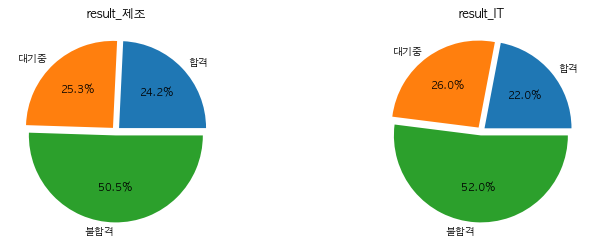

In [24]:
pie_plot(df, 'result', '제조/화학', 'IT/웹/통신')
second_png2 = 'plots/result_제조_IT.png'

대기중    24
불합격    47
합격     56
Name: result, dtype: int64
127

대기중    37
불합격    69
합격     77
Name: result, dtype: int64
183

plots/result_교육_서비.png


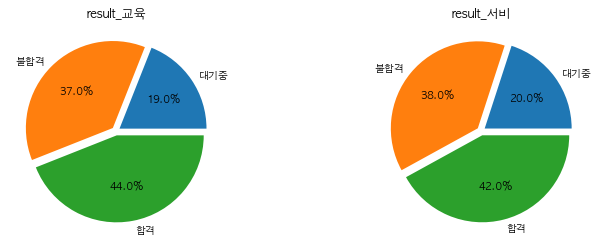

In [25]:
pie_plot(df, 'result', '교육업', '서비스업')
second_png3 = 'plots/result_교육_서비.png'

#### 산업 전체의 구직자들의 구직 성공률

6244
plots/전체_지원자_result.png


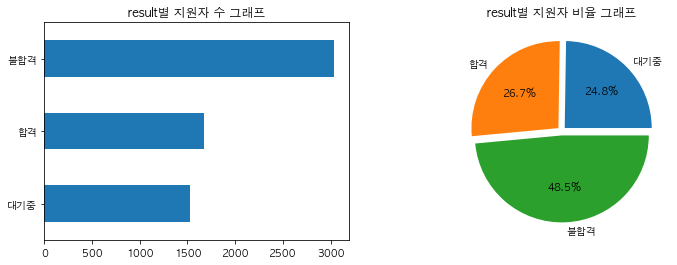

In [26]:
pie_graph_single(df, 'result', '전체')

In [27]:
third_png1 = "plots/전체_지원자_result.png"
third_title1 = "산업 전체의 구직자들의 구직 성공률"
third_insight1 = "2019년 구직자들의 구직 성공률은 26%로 구직이 힘든 것으로 보임."

#### 지역별 구직활동 빈도

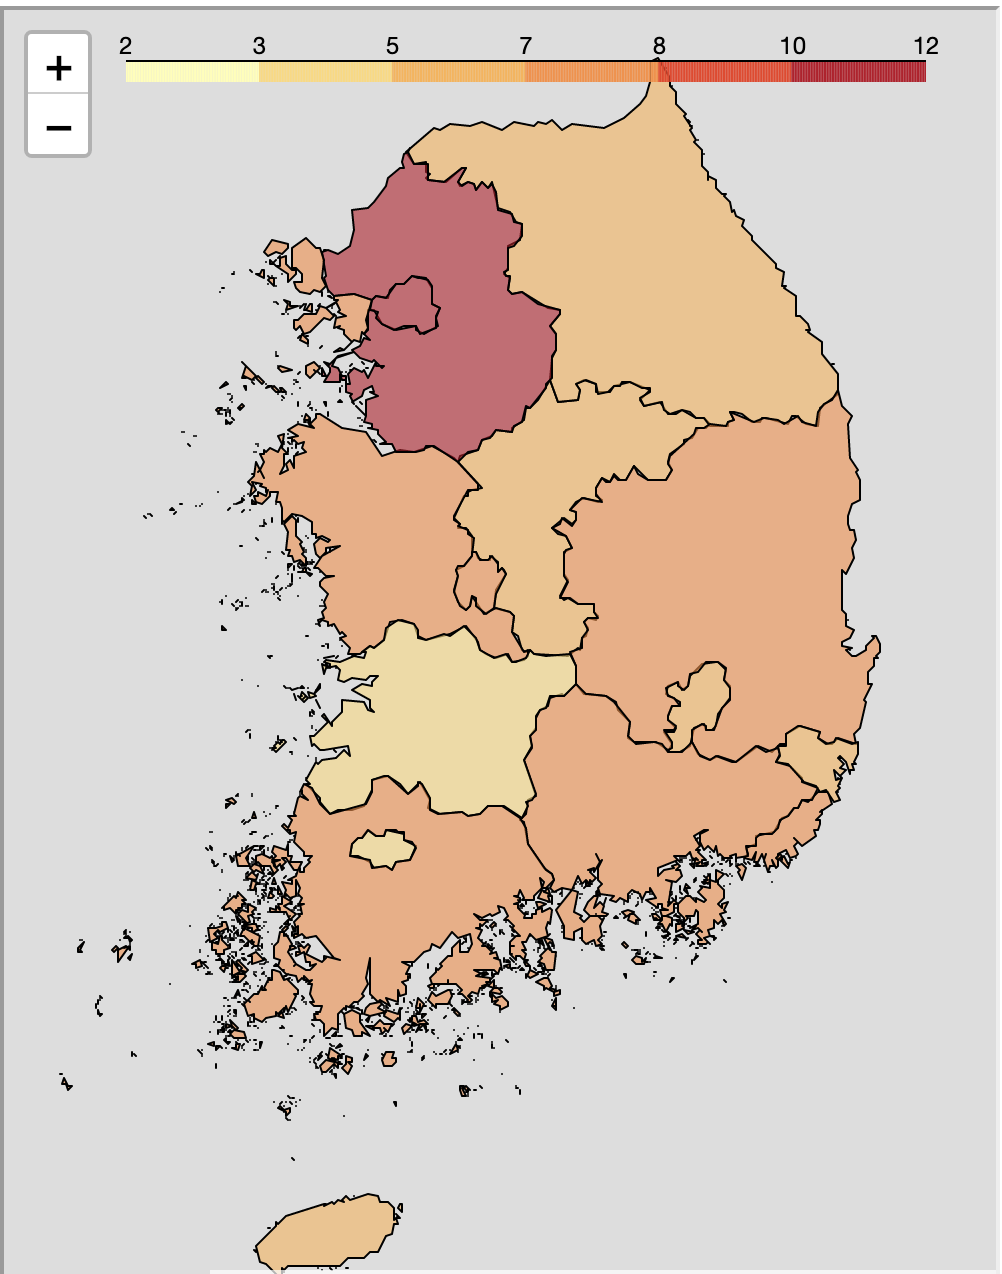

In [28]:
the_map = folium.Map(location = [36, 127.5], zoom_start = 7, tiles = 'Mapbox Bright')
the_map.choropleth(geo_data = geo_str, 
               data = prov, 
               columns = ['reg','count'],
               key_on = 'feature.properties.NAME_1',
               fill_color = 'YlOrRd',
               nan_fill_color = 'white')
# the_map.save('map.html')
# HTML('<iframe src=map.html width=500 height=650></iframe>')
from IPython.display import Image
Image(filename='first.png', width = 400, height = 300)

In [29]:
third_png2 = 'first.png'
third_title2 = '구직자들이 지원하는 기업의 위치'
third_insight2 = '기업의 수가 많은 서울/경기에 많은 지원을 하였고,\
        대기업의 공장이 위치해 있는 지방에는 타 지방보다 비교적 높은 지원율을 보임'

# 2. 빅히트엔터테인먼트

In [30]:
df = pd.read_csv('bighit_final.csv')
print(df.shape)
df.head(3)

(46, 15)


,company,dptment,title,jp_date,difficult,on_date,route,headline,question,thought,duration,result,experience,year,month
0,빅히트엔터테인먼트(주),디자인,사원-대졸,2019-12-21,보통,NaN,온라인지원,전화나 문자로 면접일정 공지. 그날되지않으면 조정가능. 일찍가면 대기시간있음. 면접...,경력관련하여 자기소개. 지원한 업무 관련 지식 질문. 좋아하는 아이돌이 있는가. 과...,경력관련하여 간단히 자기소개 하였고 좋아하는 아이돌은 없다 하였습니다. 면접관분들...,16.0,불합격,보통,NaT,NaT
1,빅히트엔터테인먼트(주),마케팅/시장조사,대리,2019-12-05,보통,2019-10-01,기타,서류 합격 후 면접 관련 안내는 이메일을 통해서 통지됨. 면접 안내하시는 분 굉장히...,1. 왜 해당 직무를 선택하였는지. 성격의 장단점3. 지금 다니고 있는 회사와 빅히...,회사가 지금 커져가고있다는 점을 굉장히 많이 크게 강조함입사하면 바쁠거라는점......,7.0,불합격,보통,2019,10
2,빅히트엔터테인먼트(주),미디어/홍보,사원-대졸,2019-12-04,보통,NaN,NaN,비교적 자유로운 분위기였으며 긴장을 덜어주시려고 해주셔서 감사합니다,최근 트렌드에 대해 알고계시나요?(장르불문)상사와 의견이 맞지 않는다면 어떻게 대처...,NaN,30.0,대기중,긍정적,NaT,NaT


#### 빅히트엔터테인먼트 연도별 구직자 수 추이

In [31]:
def year_month(big_df):
    year_lst = []
    mon_lst = []

    for i in big_df.on_date:
        if type(i) == type(pd.NaT):
            year = str(i)
            mon = str(i)
            year_lst.append(year)
            mon_lst.append(mon)
        else:
            year = str(str(i).split(' ')[0][:4])
            mon = str(str(i).split(' ')[0][5:7])
            year_lst.append(year)
            mon_lst.append(mon)

    return year_lst, mon_lst

(46, 15)


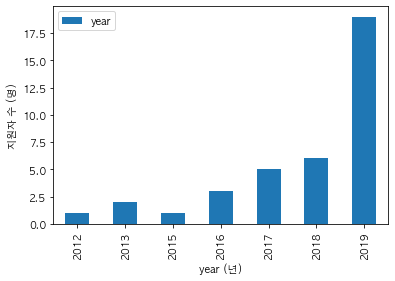

In [32]:
year_lst, mon_lst = year_month(df)
df['year'] = year_lst
df['month'] = mon_lst
print(df.shape)

check_year = pd.DataFrame(df.year.value_counts(sort = True))
check_year = check_year.sort_index(ascending = True)
ax = check_year[:-1].plot(kind = 'bar')
ax.set_xlabel('year (년)')
ax.set_ylabel('지원자 수 (명)')
plt.savefig('plots/빅히트_연도별_구직자.png')
plt.show()

In [33]:
four_png1 = 'plots/빅히트_연도별_구직자.png'
four_title1 = '빅히트엔터테인먼트 연도별 구직자 수'
four_insight1 = '빅히트엔터테인먼트는 2012~2015년까지 지원율 높지 않다가, 2016~2018년에 들어서 지원율이 급격히 높아짐.\
        2019년에 들어서는 전년 대비 300% 높은 지원율을 보이면서 기하 급수적으로 높아짐.\
        빅히트엔터테인먼트에 지원하는 구직자들이 계속 증가함으로써 기존의 업무보다 템포를 높여 좋은 인력을 캐취하는 것이 중요 '

#### 빅히트엔터테인먼트에 지원하는 구직자들은 누구인가

46
plots/빅히트_지원자_title.png


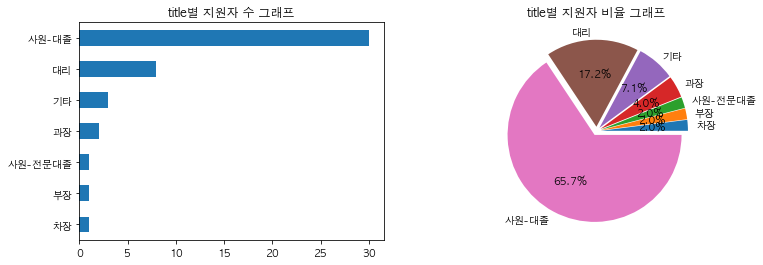

In [34]:
pie_graph_single(df, 'title','빅히트')

In [35]:
four_png2 = 'plots/빅히트_지원자_title.png'
four_title2 = '빅히트엔터테인먼트 구직자들은 누구인가'
four_insight2 = '빅히트엔터테인먼트에 지원하는 구직자들의 65.7%는 대졸 출신의 사원들로 전체 시장의 비율(62%)와 비슷하다.\
        빅히트엔터테인먼트에 17%의 대리 직급의 구직자들이 지원을 하였는데, \
        이는 전체 시장의 대리 비율인(8%)의 2배의 육박하는 수치이다. \
        빅히트엔터테인먼트에는 비교적 숙련된 구직자인 대리 직급의 지원이 높은 편이다'

#### 빅히트엔터테인먼트 구직자들의 지원부서

46
plots/빅히트_지원자_dptment.png


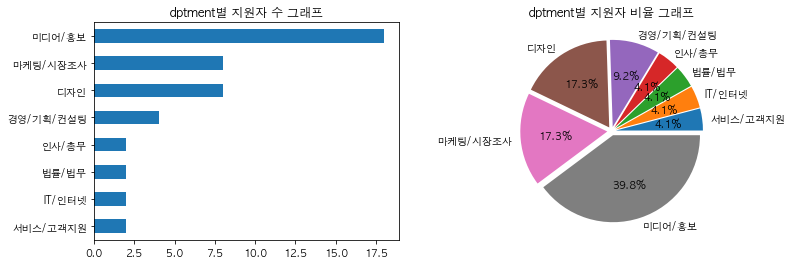

In [36]:
pie_graph_single(df, 'dptment', '빅히트')

In [37]:
five_png1 = 'plots/빅히트_지원자_dptment.png'
five_title1 = '빅히트엔터테인먼트 구직자들의 지원부서'
five_insight1 = '빅히트엔터테인먼트의 [미디어/홍보] 부서는 구직자들이 가장 많이 지원하는 부서로 구직자 전체의 40%이다.\
        [마케팅/시장조사]와 [디자인] 부서는 각각 17%로 [미디어/홍보]부서 다음으로 지원이 많은 부서이다.'
        

#### 빅히트엔터테인먼트 [미디어/홍보]에 지원하는 구직자는 누구인가

Total Applicants: 18
plots/빅히트_title_미디.png


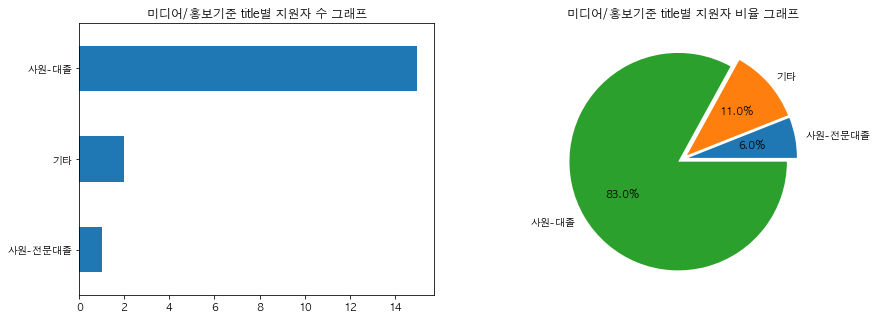

In [38]:
pie_graph_double(df, 'title', 'dptment', '미디어/홍보', '빅히트')

In [39]:
five_png2 = 'plots/빅히트_title_미디.png'
five_title2 = '빅히트엔터테인먼트 지원부서별 구직자'
five_insight2 = '빅히트엔터테인먼트의 [미디어/홍보]부서에 지원하는 구직자는 89%로 사원 직급의 구직자가 대부분이다.'
        

Total Applicants: 8
plots/빅히트_title_마케.png


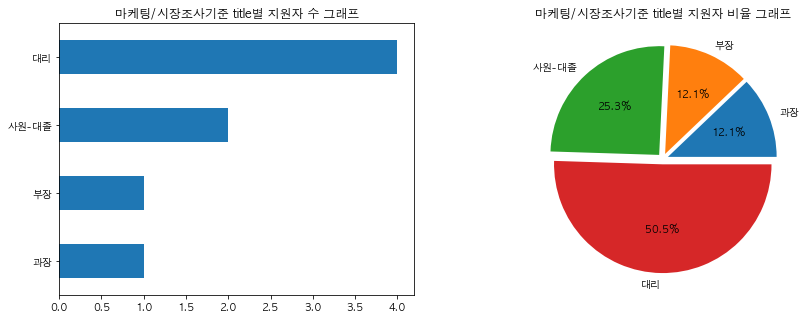

In [40]:
pie_graph_double(df, 'title', 'dptment', '마케팅/시장조사', '빅히트')

In [41]:
six_png1 = 'plots/빅히트_title_마케.png'
six_insight1 = '빅히트엔터테인먼트 [마케팅/시장조사] 부서에 지원하는 구직자 중 50%는 대리 직급의 구직자이고,\
        과장, 부장의 중책 직급의 구직자의 지원도 있음. [마케팅/시장조사] 부서는 숙련된 구직자들이 지원 함.'

Total Applicants: 8
plots/빅히트_title_디자.png


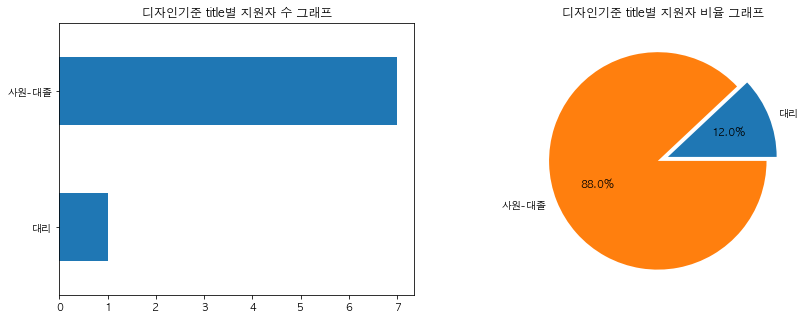

In [42]:
pie_graph_double(df, 'title', 'dptment', '디자인', '빅히트')

In [43]:
six_png2 = 'plots/빅히트_title_디자.png'
six_insight2 = '빅히트엔터테인먼트의 [디자인] 부서는 사원 88%와 대리12%로 직접적으로 많은 일을 \
해야하는 직급의 구직자들이 지원함.'


#### 지원자의 구직 성공률

46
plots/빅히트_지원자_result.png


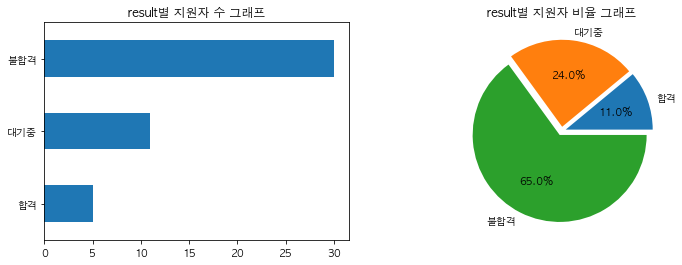

In [44]:
pie_graph_single(df, 'result', '빅히트')

In [45]:
seven_png1 = 'plots/빅히트_지원자_result.png'
seven_title1 = '빅히트엔터테인먼트 지원자의 구직 성공률'
seven_insight1 = '빅히트엔터테인먼트의 합격률을 11%로 구직이 굉장히 어렵다.\
        전체 시장의 합격률인 26%와 비교하여 더 어려운 수준이다.\
        빅히트엔터테인먼트는 지원하는 구직자의 수준보다 높은 수준의 구직자를 원하다고 추정할 수 있다.'
        

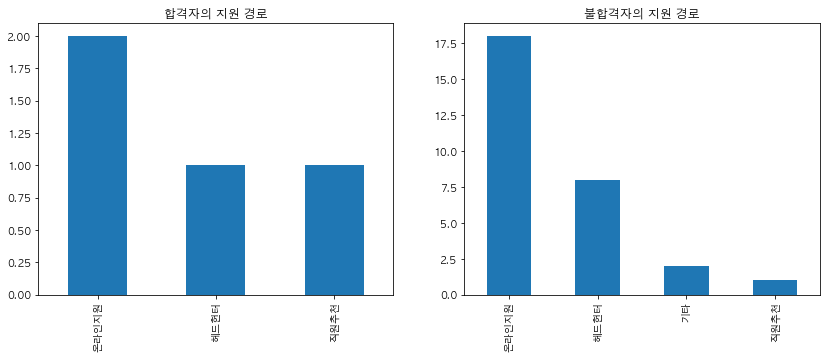

In [46]:
case1 = df['route'][df['result']=='합격'].value_counts()
case2 = df['route'][df['result']=='불합격'].value_counts()
plt.figure(figsize = (14,5))
plt.subplot(1,2,1)
plt.title("합격자의 지원 경로")
case1.plot(kind='bar')
plt.subplot(1,2,2)
plt.title("불합격자의 지원 경로")
case2.plot(kind='bar')
plt.savefig('plots/빅히트_지원경로.png')
plt.show()

In [47]:
seven_png2 = 'plots/빅히트_지원경로.png'
seven_title2 = '빅히트엔터테인먼트 지원자의 지원 경로'
seven_insight2 = '빅히트엔터테인먼트는 [온라인지원]과 [헤드헌터]를 통해 지원하는 수가 대부분임.\
        가장 많이 지원한 경로인 [온라인지원]에서 구직에 성공한 인원은 2명이므로 전체 온라인 지원자의 10%임.\
        반면에 [헤드헌터]와 [직원추천]을 통해 구직에 성공한 인원이 1명씩 있는데, 각각 13%, 100%의 성공률을 보였다.'

In [48]:
# third_png1 = "plots/지원자_result.png"
# third_title1 = "현재 구직자들의 구직 성공률 전체 산업군"
# third_insight1 = "2019년 구직자들의 구직 성공률은 46%로 절반의 구직자가 구직에 성공하는 것으로 보인다."

In [49]:
def satis_diff(df, pas, fail, comp):
    plt.figure(figsize = (12,5))
    query1 = df['experience'][df['result']==str(pas)].value_counts()
    total_sum = query1.values.sum()
    
    lab_lst = []
    val_lst = []
    
    for label, value in zip(query1.index, query1.values):
        lab_lst.append(label)
        val_lst.append(value)
        
    ratio = [int(round(int(i)/total_sum,2)*100) for i in val_lst]
    
    exp_len = len(query1)
    exp_lst = []
    for i in range(len(query1)):
        exp_lst.append(0.05)
    
    lab_lst = ['긍정적', '보통', '부정적']
    plt.subplot(1,2,1)
    plt.pie(ratio, labels = lab_lst, autopct = '%0.1f%%',
            shadow = True, startangle = 90,
            explode = tuple(exp_lst),
            colors = ['green','yellowgreen','red'])
    plt.title('면접후기_'+ str(pas))
    
    query2 = df['experience'][df['result']==str(fail)].value_counts()
    total_sum = query2.values.sum()
    
    lab_lst = []
    val_lst = []
    
    for label, value in zip(query2.index, query2.values):
        lab_lst.append(label)
        val_lst.append(value)
        
    ratio = [int(round(int(i)/total_sum,2)*100) for i in val_lst]
    
    exp_len = len(query2)
    exp_lst = []
    for i in range(len(query2)):
        exp_lst.append(0.05)
    
    lab_lst = ['긍정적', '보통', '부정적']
    plt.subplot(1,2,2)
    plt.pie(ratio, labels = lab_lst, autopct = '%0.1f%%',
            shadow = True, startangle = 90,
            explode = tuple(exp_lst),
            colors = ['green','yellowgreen','red'])
    plt.title('면접후기_'+ str(fail))
    img_name = 'plots/'+str(comp)+'_면접후기.png'
    print(img_name)
    plt.savefig(img_name)
    plt.show()

plots/빅히트_면접후기.png


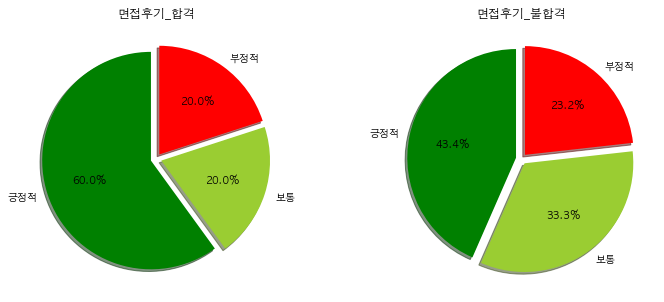

In [50]:
satis_diff(df, '합격', '불합격', '빅히트')

In [51]:
eight_png1 = 'plots/빅히트_면접후기.png'
eight_title1 = '빅히트엔터테인먼트 지원자 면접후기 평가'
eight_insight1 = '합격자와 불합격자의 면접후기 부정적 평가는 20% 초반으로 비슷한 추이를 나타냄.\
        합격자는 긍정적인 평가를 60%, 불합격자는 면접후기를 43.4% 비교적 안정적으로 긍정적인 평가를 함.\
        하지만 면접자의 후기는 구직자에게 회사의 이미지가 될 요소가 있으므로 20%의 부정적인 요소를 줄이기 위한 노력이 필요.'

# 3. 2019년 동종 업계 vs 빅히트

In [52]:
media = pd.read_csv('job_media.csv')
media.head(3)

,index,company,dptment,title,jp_date,difficult,on_date,route,headline,question,...,duration,result,experience,comp_id,type,region,avg_salary,year,month,salary
0,2649,피엑스디,IT/인터넷,사원-대졸,2019-08-29,어려움,2019-05-01,온라인지원,"전공질문이 대부분이었고, 인성면접도 조금 포함되어있었습니다. 대부분의 분위기는 좋았...","프로젝트 경험 관련 질문 대부분이었으며, 데이터베이스 관련 질문해주셨습니다.",...,15.0,불합격,긍정적,89630,미디어/디자인,서울,3668.0,2019,5,3000
1,2651,피엑스디,디자인,기타,2019-05-11,어려움,2019-02-01,학교취업지원센터,포트폴리오 제출하고 2주 정도 뒤 메일로 연락 받았습니다. 팀장님들과 면접 본 뒤 ...,자기소개 / 포트폴리오 설명 / 작업 중 갈등을 어떻게 해결했는지 / 본인의 장단점...,...,14.0,합격,긍정적,89630,미디어/디자인,서울,3668.0,2019,2,3000
2,2653,피엑스디,디자인,사원-대졸,2019-03-08,쉬움,2019-02-01,직원추천,"포트폴리오 관련 질문, 성격에 관련된 질문으로 진행됨. 1차 면접 이후 2차 임원면...",-프로젝트의 진행과정 서술-팀 작업 시 어떤 과정이 있었고 분쟁사항이나 문제점을 어...,...,1.0,불합격,부정적,89630,미디어/디자인,서울,3668.0,2019,2,3000


273
plots/동종_지원자_title.png


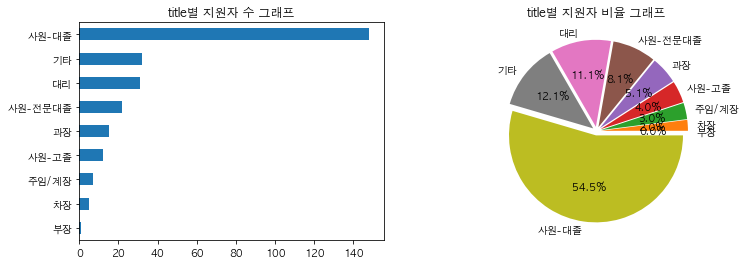

In [53]:
pie_graph_single(media, 'title','동종')

In [54]:
nine_png1 = 'plots/동종_지원자_title.png'
nine_title1 = '동종업계 구직자들은 누구인가'
nine_insight1 = '동종업계는 [사원-대졸] 직급자가 55%로 빅히트엔터테인먼트보다 10%가량 낮은 트렌드를 보이고 있다.\
            반면에, [사원-전문대졸]과 [사원-고졸] 인력이 더 높은 수치로 구직활동을 함.'

273
plots/동종_지원자_dptment.png


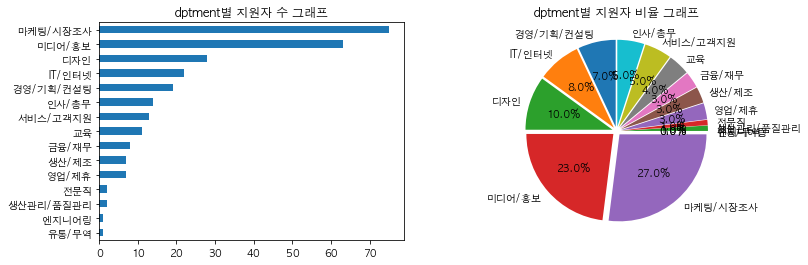

In [55]:
pie_graph_single(media, 'dptment', '동종')

In [56]:
nine_png2 = 'plots/동종_지원자_dptment.png'
nine_title2 = '동종업계 구직자들의 지원부서'
nine_insight2 = '동종업계는 빅히트엔터테인먼트와 비슷하게 [마케팅/시장조사],[미디어/홍보],[디자인] 부서의 지원자가 많은 것으로 나타남.\
        동종업계는 눈에 띄이게 다른 것은 동종업계의 [IT/인터넷] 부서 지원율이 8%로 빅히트엔터테인먼트의 4%보다 비율이 높다.'

Total Applicants: 63
plots/동종_title_미디.png


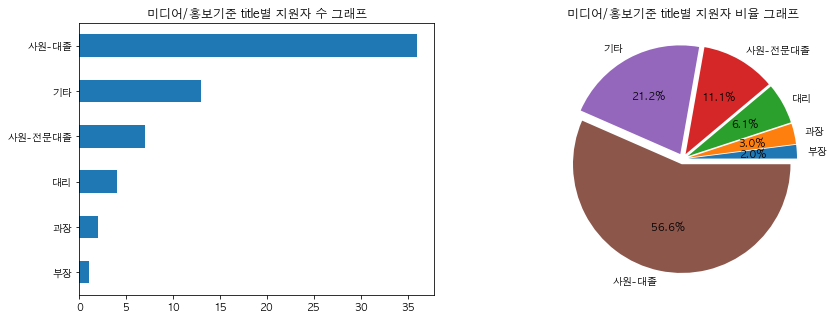

In [57]:
pie_graph_double(media, 'title', 'dptment', '미디어/홍보', '동종')

In [58]:
ten_png1 = 'plots/동종_title_미디.png'
ten_png2 = 'plots/동종_title_마케.png'
ten_png3 = 'plots/동종_title_디자.png'
ten_png4 = 'plots/동종_title_IT.png'

ten_title1 = '동종업계 지원부서별 구직자'
ten_insight1 = '동종업계는 지원부서별 구직자의 직책이 고르게 지원. 각 부서별 직책에 맞는 일자리가 세팅이 되어 있다고 추정할 수 있음'

Total Applicants: 75
plots/동종_title_마케.png


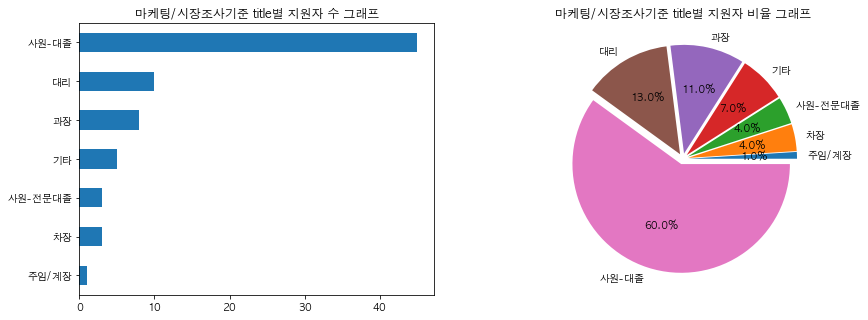

In [59]:
pie_graph_double(media, 'title', 'dptment', '마케팅/시장조사', '동종')

Total Applicants: 28
plots/동종_title_디자.png


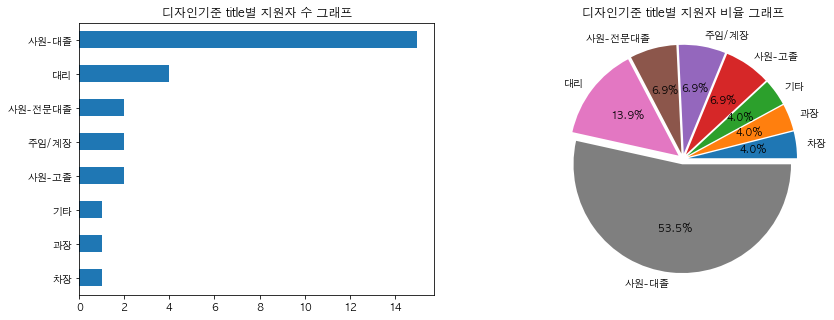

In [60]:
pie_graph_double(media, 'title', 'dptment', '디자인', '동종')

Total Applicants: 22
plots/동종_title_IT.png


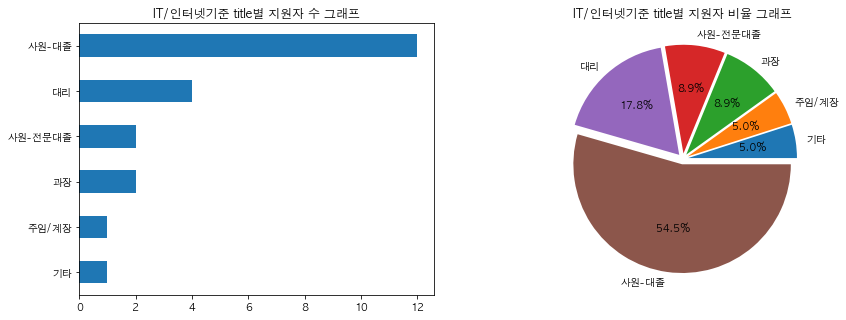

In [61]:
pie_graph_double(media, 'title', 'dptment', 'IT/인터넷', '동종')

273
plots/동종_지원자_result.png


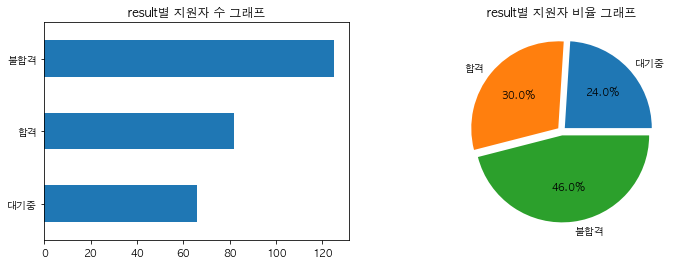

In [62]:
pie_graph_single(media, 'result', '동종')

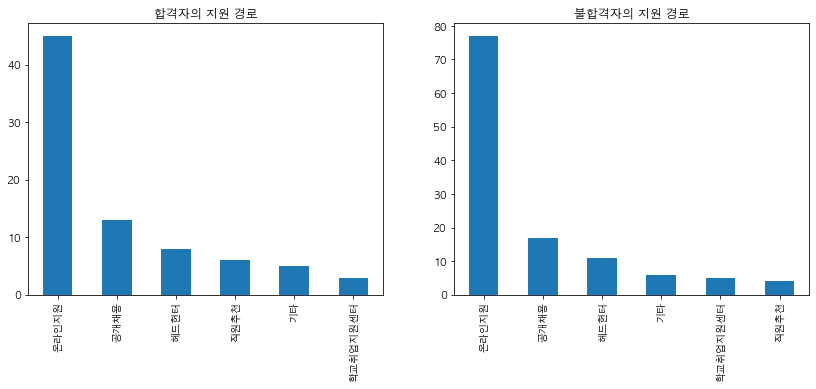

In [63]:
case1 = media['route'][media['result']=='합격'].value_counts()
case2 = media['route'][media['result']=='불합격'].value_counts()
plt.figure(figsize = (14,5))
plt.subplot(1,2,1)
plt.title("합격자의 지원 경로")
case1.plot(kind='bar')
plt.subplot(1,2,2)
plt.title("불합격자의 지원 경로")
case2.plot(kind='bar')
plt.savefig('plots/동종_지원경로.png')
plt.show()

plots/동종_면접후기.png


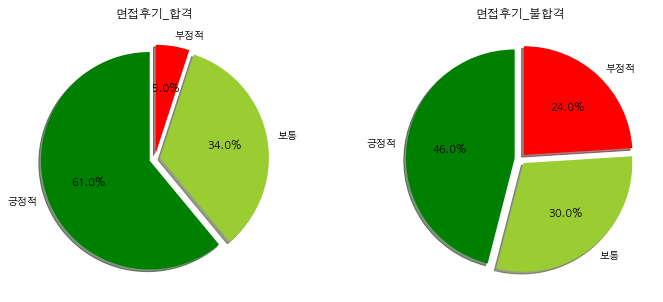

In [64]:
satis_diff(media, '합격', '불합격', '동종')

In [65]:
eleven_png1 = 'plots/동종_면접후기.png'
eleven_title1 = '동종업계 지원자 면접후기 평가'
eleven_insight1 = '동종업계의 합격자와 불합격자의 긍정적 평가는 각각 61%, 46%로 빅히트와 차이가 없다.\
        합격자의 부정적인 평가에서 가장 큰 차이가 나타나는데, 빅히트엔터테인먼트의 합격자의 20%는 부정적인 평가를 냄.\
        동종업계 합격자는 5%만이 부정적인 평가를 냄.'

# 4. 면접 후기로 본 빅히트엔터테인먼트 회사 이미지

In [66]:
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter
nlp = Twitter()

In [67]:
def word_cloud(df, question, pass_fail):
    word_lst = []
    for i in df[str(question)][df.result == str(pass_fail)]:
        val = nlp.pos(str(i))
        word_lst.append(val)

    hts_lst = []
    for pack in word_lst[:10]:
        for word, tag in pack:
            if tag in ['Noun'] and ("것" not in word) and ("내" not in word)and ("나" not in word)and("수"not in word) and("게"not in word)and("말"not in word)and("함"not in word) and("점"not in word):
                hts_lst.append(word)      

    count = Counter(hts_lst)            
    words = dict(count.most_common())
    words

    cloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
                      background_color='white').generate_from_frequencies(words)
    return cloud

def word_cloud_plot(df, what, who):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 4))
    pass_user = word_cloud(df, str(what), '합격')
    fail_user = word_cloud(df, str(what), '불합격')
    if what == 'question':
        what = '면접질문'
    elif what == 'thought':
        what = '면접대답'
    ax1.imshow(pass_user)
    ax1.set_title('합격자의 '+ what)
    ax1.axis('off')
    ax2.imshow(fail_user)
    ax2.set_title('불합격자의 '+ what)
    ax2.axis('off')
    img_name = 'plots/'+str(what)+'_단어.png'
    plt.savefig(img_name)
    print(img_name)
    plt.show()
    

plots/면접질문_단어.png


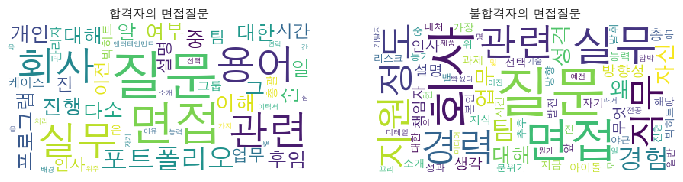

In [68]:
word_cloud_plot(df, 'question', '합격')

In [69]:
twelve_png1 = 'plots/면접질문_단어.png'
twelve_title1 = '면접후기에 가장 많이 사용 된 단어'
# twelve_insight1 = '용어, 실무, 포트폴리오에 대한 질문이 많았음을 추정'

plots/면접대답_단어.png


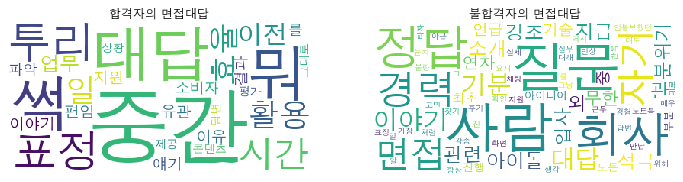

In [70]:
word_cloud_plot(df, 'thought', '합격')

In [71]:
twelve_png2 = 'plots/면접대답_단어.png'
# twelve_title2 = '동종업계 지원자 면접후기 평가'
# twelve_insight2 = '동종업계의 합격자와 불합격자의 긍정적 평가는 각각 61%, 46%로 빅히트와 차이가 없다.\
#         합격자의 부정적인 평가에서 가장 큰 차이가 나타나는데, 빅히트엔터테인먼트의 합격자의 20%는 부정적인 평가를 냄.\
#         동종업계 합격자는 5%만이 부정적인 평가를 냄.'

plots/headline_단어.png


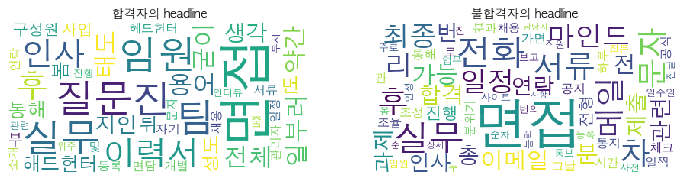

In [72]:
word_cloud_plot(df, 'headline', '합격')

In [73]:
twelve_png3 = 'plots/headline_단어.png'


## 5. ML application - Sentiment Analysis

In [74]:
# sent_df = job_df[['headline','question','thought','experience']][job_df.experience != '보통']
# val_lst = []
# for i in sent_df.experience:
#     if str(i) == '긍정적':
#         val_lst.append(1)
#     else:
#         val_lst.append(0)
# sent_df['label'] = val_lst
# print(sent_df.shape)
# sent_df.head()

#### Tokeninzing

In [75]:
# from konlpy.tag import Okt
# okt = Okt()

# def re_norm(i):
#     return re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]',"",str(i))

# def tokenize(doc):
#     return ['/'.join(i) for i in okt.pos(re_norm(doc))]

In [76]:
# train = sent_df[:50000]
# test = sent_df[50000:]
# train.shape, test.shape

In [77]:
# train.head()

#### 훈련 데이터 토크나이징
- 훈련 데이터 150만


In [78]:
# %%time
# train_docs = []
# for i in train.thought:
#     try:
#         train_docs.append(tokenize(i))
#     except TypeError:
#         pass
# len(train_docs)
# train_docs[:1]

#### 테스트 데이터 토크나이징
- 테스트 데이터 36만

In [79]:
# %%time
# test_docs = []
# for i in test.thought:
#     try:
#         test_docs.append(tokenize(i))
#     except TypeError:
#         pass
# len(test_docs)
# test_docs[:1]

In [80]:
# train_tokens = [k for i in train_docs for k in i]
# test_tokens = [k for i in test_docs for k in i]
# print(len(train_tokens), len(test_tokens))

In [81]:
# import nltk
# train_text = nltk.Text(train_tokens, name = 'NMSC')
# print("Total token count:",len(train_text.tokens))
# print("Total Unique token count:",len(set(train_text.tokens)))

#### Bag of Words
- 가장 많이 쓰는 단어 10000개를 가지고 머신러닝 입력값에 인자값으로 사용

In [82]:
# %%time
# common_words = train_text.vocab().most_common(15000)
# word_lst = [i for i in common_words if str(i[0]).split('/')[1] != 'Alpha']
# word_lst[:30]

In [83]:
# selected_word = [i[0] for i in word_lst if str(i[0]).split('/')[1] == 'Noun' and len(str(i[0]).split('/')[0])>1]
# selected_word[:10]

In [84]:
# def term_frequency(doc):
#     return [doc.count(i) for i in selected_word]


In [85]:
# %%time
# x_train_pre = [term_frequency(i) for i in train_docs]
# x_test_pre = [term_frequency(i) for i in test_docs]
# y_train_pre = [i for i in train.label]
# y_test_pre = [i for i in test.label]

In [86]:
# %%time
# x_train = np.asarray(x_train_pre).astype('float32')
# x_test = np.asarray(x_test_pre).astype('float32')
# y_train = np.asarray(y_train_pre).astype('float32')
# y_test = np.asarray(y_test_pre).astype('float32')

### 딥러닝

In [87]:
# from tensorflow.keras import models, layers, optimizers, losses, metrics
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
# from keras.callbacks import EarlyStopping


In [88]:
# %%time
# model = models.Sequential()
# model.add(layers.Dense(128, activation = 'relu', kernel_initializer='he_normal', input_shape = (x_train.shape[1],)))
# model.add(layers.Dropout(0.5))
# model.add(BatchNormalization())

# model.add(layers.Dense(64, activation = 'relu', kernel_initializer='he_normal'))
# model.add(layers.Dropout(0.5))
# model.add(BatchNormalization())

# model.add(layers.Dense(1, activation = 'sigmoid'))
# model.compile(optimizer = 'adam',
#               loss = 'binary_crossentropy',
#               metrics = ['accuracy'])
# model.summary()

In [89]:
# %%time

# early_stopping = EarlyStopping(monitor='val_loss', patience=10)
# history = model.fit(x_train, y_train, epochs = 100, validation_split = 0.7,
#                     batch_size = 32, verbose = 2, callbacks = [early_stopping])

In [90]:
# model.evaluate(x_test, y_test)


In [91]:
# fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 4))

# ax1.plot(history.history['loss'])
# ax1.plot(history.history['val_loss'])
# ax1.set_xlabel('epoch')
# ax1.set_ylabel('loss')

# ax2.plot(history.history['acc'])
# ax2.plot(history.history['val_acc'])
# ax2.set_xlabel('epoch')
# ax2.set_ylabel('acc')
# plt.show()

In [92]:

# def test_review(i, model):
#     token = tokenize(i)
#     tf = term_frequency(token)
#     data = np.expand_dims(np.asarray(tf).astype('float32'), axis = 0)
#     score = float(model.predict(data))
#     if score > 0.8:
#         sentiment = "긍정"
#         print("ML says:",colored(sentiment,'blue'), round(score * 100,2),'% \n', i)
#         print()
#     else:
#         sentiment = "부정"
#         print("ML says:",colored(sentiment,'red'), round((1-score) * 100,2),'% \n', i)
#         print()
#     return sentiment

In [93]:
# val_lst = []
# for i, real in zip(df.thought, df.experience):
#     if real == '부정적':
#         print("Real:",colored(real, 'red'), "Real Value")
#     else:
#         print("Real:",colored(real, 'blue'), "Real Value")
#     val = test_review(i, model)
#     val_lst.append(val)

In [94]:
thirteen_png = 'plots/텍스트분석.png'
thirteen_title = 'ML(80% 정확도)이 면접 후기를 읽고 긍정/부정 감정 분석'

In [95]:
from jinja2 import Environment, FileSystemLoader
from weasyprint import HTML
import argparse
import locale
locale.getdefaultlocale()

('en_US', 'UTF-8')

In [96]:
# !pip install weasyprint
# !conda install cairo
# !conda install Pango
# !pip install --upgrade CairoSVG
# !pip install CPython

In [97]:
cwd = "file://"+str(os.getcwd()) + '/'

In [98]:
env = Environment(loader=FileSystemLoader('.'))
template = env.get_template('bighit.html')
template_vars = {
    # main page
    "main_title" : main_title,
    "main_owner" : main_owner,
    "main_png" : cwd + main_png,                
    "side_png" : cwd + side_png,
    
    # first page
    "first_title1": first_title1,
    "first_insight1": first_insight1,
    "first_png1"  : cwd + first_png1,
    
    "first_title2": first_title2,
    "first_insight2": first_insight2,
    "first_png2"  : cwd + first_png2,

    # second page
    'second_title1' : second_title1,
    'second_insight1' : second_insight1,
    'second_png1' : cwd + second_png1,
    
    'second_png2': cwd + second_png2,
    'second_png3': cwd + second_png3,
    'second_title2': second_title2,
    'second_insight2':second_insight2,
    
    #thrid page
    'third_title1' : third_title1,
    'third_insight1' : third_insight1,
    'third_png1' : cwd + third_png1,
    
    'third_title2' : third_title2,
    'third_insight2' : third_insight2,
    'third_png2' : cwd + third_png2,
    
    #fourth page
    'four_title1' : four_title1,
    'four_insight1' : four_insight1,
    'four_png1' : cwd + four_png1,
    
    'four_title2' : four_title2,
    'four_insight2' : four_insight2,
    'four_png2' : cwd + four_png2,
    
    #fifth page
    'five_title1' : five_title1,
    'five_insight1' : five_insight1,
    'five_png1' : cwd + five_png1,
    
    'five_title2' : five_title2,
    'five_insight2' : five_insight2,
    'five_png2' : cwd + five_png2,
    
    #sixth page
    'six_insight1' : six_insight1,
    'six_png1' : cwd + six_png1,
    
    'six_insight2' : six_insight2,
    'six_png2' : cwd + six_png2,
    
    #seven page
    'seven_title1' : seven_title1,
    'seven_insight1' : seven_insight1,
    'seven_png1' : cwd + seven_png1,
    
    'seven_title2' : seven_title2,
    'seven_insight2' : seven_insight2,
    'seven_png2' : cwd + seven_png2,
    
    #eight page
    'eight_title1' : eight_title1,
    'eight_insight1' : eight_insight1,
    'eight_png1' : cwd + eight_png1,
        
    #nine page
    'nine_title1' : nine_title1,
    'nine_insight1' : nine_insight1,
    'nine_png1' : cwd + nine_png1,
    
    'nine_title2' : nine_title2,
    'nine_insight2' : nine_insight2,
    'nine_png2' : cwd + nine_png2,

    #ten page
    'ten_title1' : ten_title1,
    'ten_insight1' : ten_insight1,
    'ten_png1' : cwd + ten_png1,
    'ten_png2' : cwd + ten_png2,
    'ten_png3' : cwd + ten_png3,
    'ten_png4' : cwd + ten_png4,
    
    #eleven page
    'eleven_title1' : eleven_title1,
    'eleven_insight1' : eleven_insight1,
    'eleven_png1' : cwd + eleven_png1,
    
    #twelve page
    'twelve_title1' : twelve_title1,
    'twelve_png1' : cwd + twelve_png1,
    'twelve_png2' : cwd + twelve_png2,
    'twelve_png3' : cwd + twelve_png3,
    
    #thirteen page
    'thirteen_title' : thirteen_title,
    'thirteen_png' : cwd + thirteen_png
}
html_out = template.render(template_vars)
output_name = "/Users/jaygykay/Desktop/BIGHIT_report" +'.pdf'
# with open(output_name, 'wb') as file:
HTML(string=html_out).write_pdf(output_name, stylesheets=["style.css"])